In [20]:
import numpy as np
import json
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib
from collections import defaultdict

plt.rcParams['figure.figsize'] = [16, 4]
from plot_utils import *

In [21]:
def plot_one_pval_TE_final(ax,run_list,main_enum,fname_pattern,pval_list,debug_tidx,rr_lambda,reg_lambda,tmle_lambda,l2_lambda,dcf,noise,plot_item_list,topic_name,hlayer=None,num_sample=None,pvalt1=None):
    #Getting the metrics
    if pvalt1!=None:
        result_dict = get_all_result_dict(
                                run_list=run_list,
                                pval_list=pval_list,
                                enum=main_enum,
                                fname_pattern=fname_pattern.format(
                                                            "{1}",
                                                            "{0}",
                                                            pvalt1,
                                                            debug_tidx,
                                                            rr_lambda,
                                                            tmle_lambda,
                                                            l2_lambda,
                                )

        )
    elif hlayer!=None:
        result_dict = get_all_result_dict(
                                run_list=run_list,
                                pval_list=pval_list,
                                enum=main_enum,
                                fname_pattern=fname_pattern.format(
                                                            "{1}",
                                                            num_sample,
                                                            hlayer,
                                                            "{0}",
                                                            debug_tidx,
                                                            rr_lambda,
                                                            reg_lambda,
                                                            tmle_lambda,
                                                            l2_lambda,
                                                            dcf,
                                                            noise,
                                )

        )
    else:
        result_dict = get_all_result_dict(
                                run_list=run_list,
                                pval_list=pval_list,
                                enum=main_enum,
                                fname_pattern=fname_pattern.format(
                                                            "{1}",
                                                            num_sample,
                                                            "{0}",
                                                            debug_tidx,
                                                            rr_lambda,
                                                            tmle_lambda,
                                                            l2_lambda,
                                )

        )
        
#     print(result_dict)
    
    #Plotting the result
    for pidx,plot_item in enumerate(plot_item_list):
        #Plotting the label correlation separately
        if plot_item=="predictive_correlation":
            
            _, labels = ax[pidx].get_legend_handles_labels()
            if "y-causal corr" not in labels:
                causal_corr_list = [result_dict[pval]["y-tcausal"]["mean"] for pval in pval_list]
                confound_corr_list = [result_dict[pval]["y-tconfound"]["mean"] for pval in pval_list]
                spurious_corr_list = [result_dict[pval]["y-tspurious"]["mean"] for pval in pval_list]

                ax[pidx].plot(causal_corr_list,marker="o",ls="-.",label="y-causal corr")
                ax[pidx].plot(spurious_corr_list,marker="o",ls="-.",label="y-spurious corr")
                ax[pidx].plot(confound_corr_list,marker="o",ls="-.",label="y-confound corr")

                ax[pidx].set_xlabel("expt")
                ax[pidx].set_ylabel(plot_item)

                ax[pidx].legend()
                ax[pidx].grid(True)
            
            continue
        
        #printing the mean
        
        #Plotting the results
        item_yval = np.array([result_dict[pval][plot_item]["mean"] for pval in pval_list])
        #yerr=[0.0]*len(item_yval)
        yerr = np.array([result_dict[pval][plot_item]["std"] for pval in pval_list])
        #Plotting the item
        
        if(pvalt1!=None):
            ax[pidx].plot(pval_list,item_yval,label="topic={}".format(debug_tidx),ls="-.",marker="o",alpha=0.7)
            ax[pidx].set_xlabel("predictive-correlation")
        else:
            ax[pidx].plot(range(len(pval_list)),item_yval,label="topic={}".format(debug_tidx),ls="-.",marker="o",alpha=0.7)
            ax[pidx].fill_between(range(len(pval_list)),item_yval-yerr,item_yval+yerr,alpha=0.3)
            ax[pidx].set_xlabel("expt")
        
        ax[pidx].set_ylabel(plot_item)
        
        ax[pidx].legend()
        ax[pidx].grid(True)

In [33]:
def plot_one_pval_TE_timeline(ax,run_list,main_enum,pval_list,fname_pattern,debug_tidx,rr_lambda,reg_lambda,tmle_lambda,l2_lambda,noise,topic_name,tidx,hlayer=None,num_sample=None,plot_upto=-1,plot_per_idx=1):
    #Getting the metrics
    result_dict_timeline = get_all_result_timeline(
                        run_list=run_list,
                        pval_list=pval_list,
                        fname_pattern=fname_pattern.format(
                                                    "{1}",
                                                    num_sample,
                                                    hlayer,
                                                    "{0}",
                                                    debug_tidx,
                                                    rr_lambda,
                                                    reg_lambda,
                                                    tmle_lambda,
                                                    l2_lambda,
                                                    noise,
                                                    topic_name,
                        )
    )

    for pidx,plot_item in enumerate(plot_item_list):
        for pval in pval_list:
            #Getting the timeline item
            item_pval_yval_timeline = result_dict_timeline[pval][plot_item]["mean"].tolist()
            yerr=[0.0]*len(item_pval_yval_timeline)
            xval = list(range(len(item_pval_yval_timeline)))

            #Plotting the item
            ax[pidx,tidx].errorbar(xval[::2][:plot_upto][::plot_per_idx],item_pval_yval_timeline[::2][:plot_upto][::plot_per_idx],yerr[::2][:plot_upto][::plot_per_idx],label="pval={}".format(pval),ls="-.",marker="o",alpha=0.7)
            #ax[pidx,anidx].fill_between(pval_list,ylb,yub,alpha=0.2)

            ax[pidx,tidx].set_xlabel("epoch")
            ax[pidx,tidx].set_ylabel(plot_item)

            ax[pidx,tidx].legend()
            ax[pidx,tidx].grid(True)
            
#             ax[pidx,tidx].set_title("topic="+topic_name)
            ax[pidx,tidx].set_title("l2_lambda="+str(l2_lambda))
            
            
#             plot_per_idx=plot_per_idx
#             ax[pidx,].errorbar(xval[:plot_upto][::plot_per_idx],item_pval_yval_timeline[:plot_upto][::plot_per_idx],yerr[:plot_upto][::plot_per_idx],label="pval={}".format(pval),ls="-.",marker="o",alpha=0.7)
#             #ax[pidx,anidx].fill_between(pval_list,ylb,yub,alpha=0.2)

#             ax[pidx,].set_xlabel("epoch")
#             ax[pidx,].set_ylabel(plot_item)

#             ax[pidx,].legend()
#             ax[pidx,].grid(True)
            
#             ax[pidx,].set_title("topic="+topic_name)
            

# CeBAB Dataset

In [23]:
run_list=[1,]
main_enum=50
hlayer=0

rr_lambda=1
reg_lambda=1
tmle_lambda=0
l2_lambda=0.0
# debug_tidx_list=[0,1]
topic_list=["food","service","ambiance","noise"]
num_sample_list=[750,500,200,65]
debug_tidx=0

pval_list=[""]
# degree_confoundedness=0.0

noise=0.0

plot_item_list=[
            "te_train",
#             "te_corr_train",
            "te_dr_train",
            "te_valid",
#             "te_corr_valid",
            "te_dr_valid",
            "rr_loss",
            "reg_loss",
#             "tmle_loss",
#             "l2_loss",
#             "alpha:tdtidx0-tcf0",
#             "alpha:tdtidx0-tcf1",
#             "alpha:tdtidx1-tcf0",
#             "alpha:tdtidx1-tcf1",
]


plt.rcParams['figure.figsize'] = [20, 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),len(topic_list))

tidx=0
for topic_name,num_sample in zip(topic_list,num_sample_list):
    fname_pattern= "dataset/cebab/nlp_logs/cad.cebabs1riesz.rnum({}).sample({}).hlayer({}).pvaltsp({}).dtidx({}).rr_lmd({}).reg_lmd({}).tmle_lmd({}).l2_lmd({}).dcf().noise({}).topic({})/probe_metric_list.json"
    plot_one_pval_TE_timeline(ax=ax,
                           run_list=run_list,
                           num_sample=num_sample,
                           pval_list=pval_list,
                           hlayer=hlayer,
                           main_enum=main_enum,
                           fname_pattern=fname_pattern,
                           debug_tidx=debug_tidx,
                           rr_lambda=rr_lambda,
                           reg_lambda=reg_lambda,
                           tmle_lambda=tmle_lambda,
                           l2_lambda=l2_lambda,
                           noise=noise,
                           topic_name=topic_name,
                           tidx=tidx,
    )
    tidx+=1

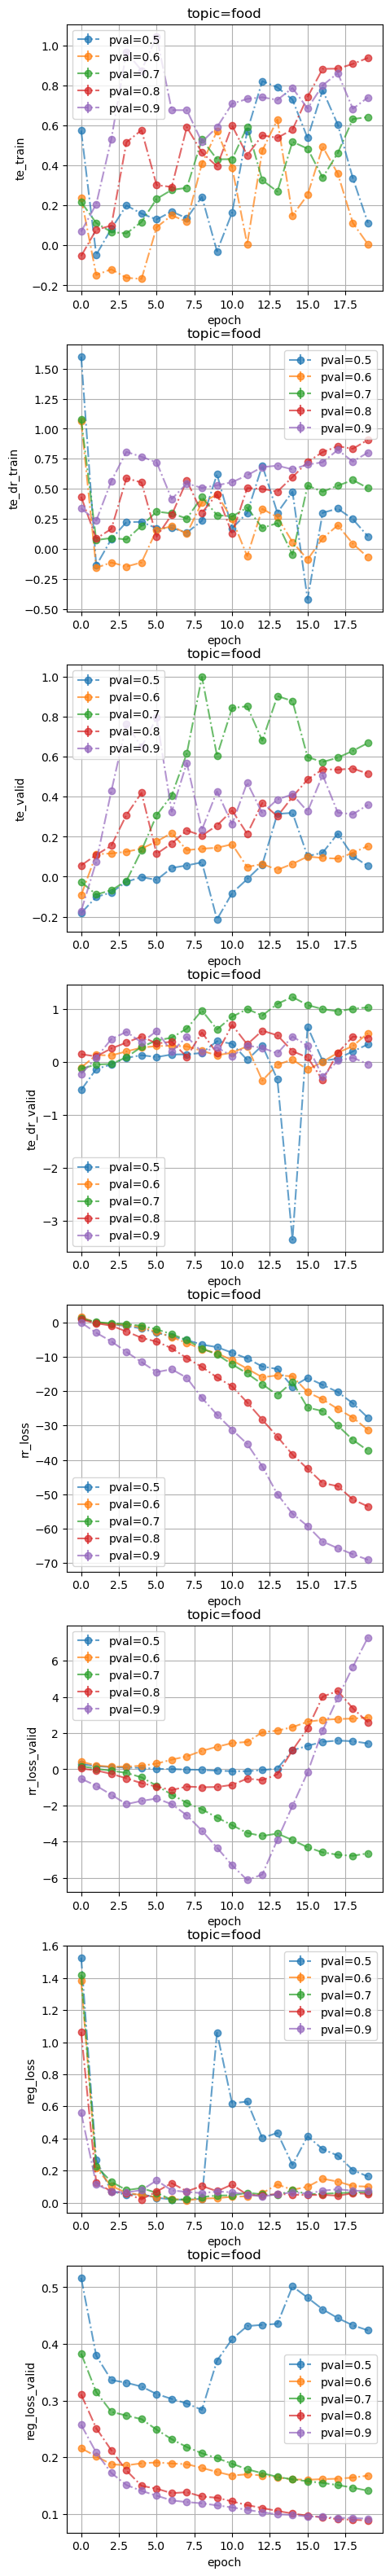

In [24]:
run_list=[3,]
main_enum=20
hlayer=0

rr_lambda=1
reg_lambda=1
tmle_lambda=0
l2_lambda = 0.0
# debug_tidx_list=[0,1]
topic_list=["food",]
num_sample_list=[350,]
debug_tidx=0

pval_list=[0.5,0.6,0.7,0.8,0.9]
# degree_confoundedness=0.0

noise=0.0

plot_item_list=[
            "te_train",
#             "te_corr_train",
            "te_dr_train",
            "te_valid",
#             "te_corr_valid",
            "te_dr_valid",
            "rr_loss",
            "rr_loss_valid",
            "reg_loss",
            "reg_loss_valid",
#             "tmle_loss",
#             "l2_loss",
#             "alpha:tdtidx0-tcf0",
#             "alpha:tdtidx0-tcf1",
#             "alpha:tdtidx1-tcf0",
#             "alpha:tdtidx1-tcf1",
]


plt.rcParams['figure.figsize'] = [5, 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),len(topic_list))

tidx=0
for topic_name,num_sample in zip(topic_list,num_sample_list):
    fname_pattern= "dataset/cebab/nlp_logs/cad.cebabs1riesz.rnum({}).sample({}).hlayer({}).pval({}).dtidx({}).rr_lmd({}).reg_lmd({}).tmle_lmd({}).l2_lmd({}).dcf().noise({}).topic({})/probe_metric_list.json"
    plot_one_pval_TE_timeline(ax=ax,
                           run_list=run_list,
                           num_sample=num_sample,
                           pval_list=pval_list,
                           hlayer=hlayer,
                           main_enum=main_enum,
                           fname_pattern=fname_pattern,
                           debug_tidx=debug_tidx,
                           rr_lambda=rr_lambda,
                           reg_lambda=reg_lambda,
                           tmle_lambda=tmle_lambda,
                           l2_lambda=l2_lambda,
                           noise=noise,
                           topic_name=topic_name,
                           tidx=tidx,
                           plot_upto=20,
                           plot_per_idx=1,
    )
    tidx+=1

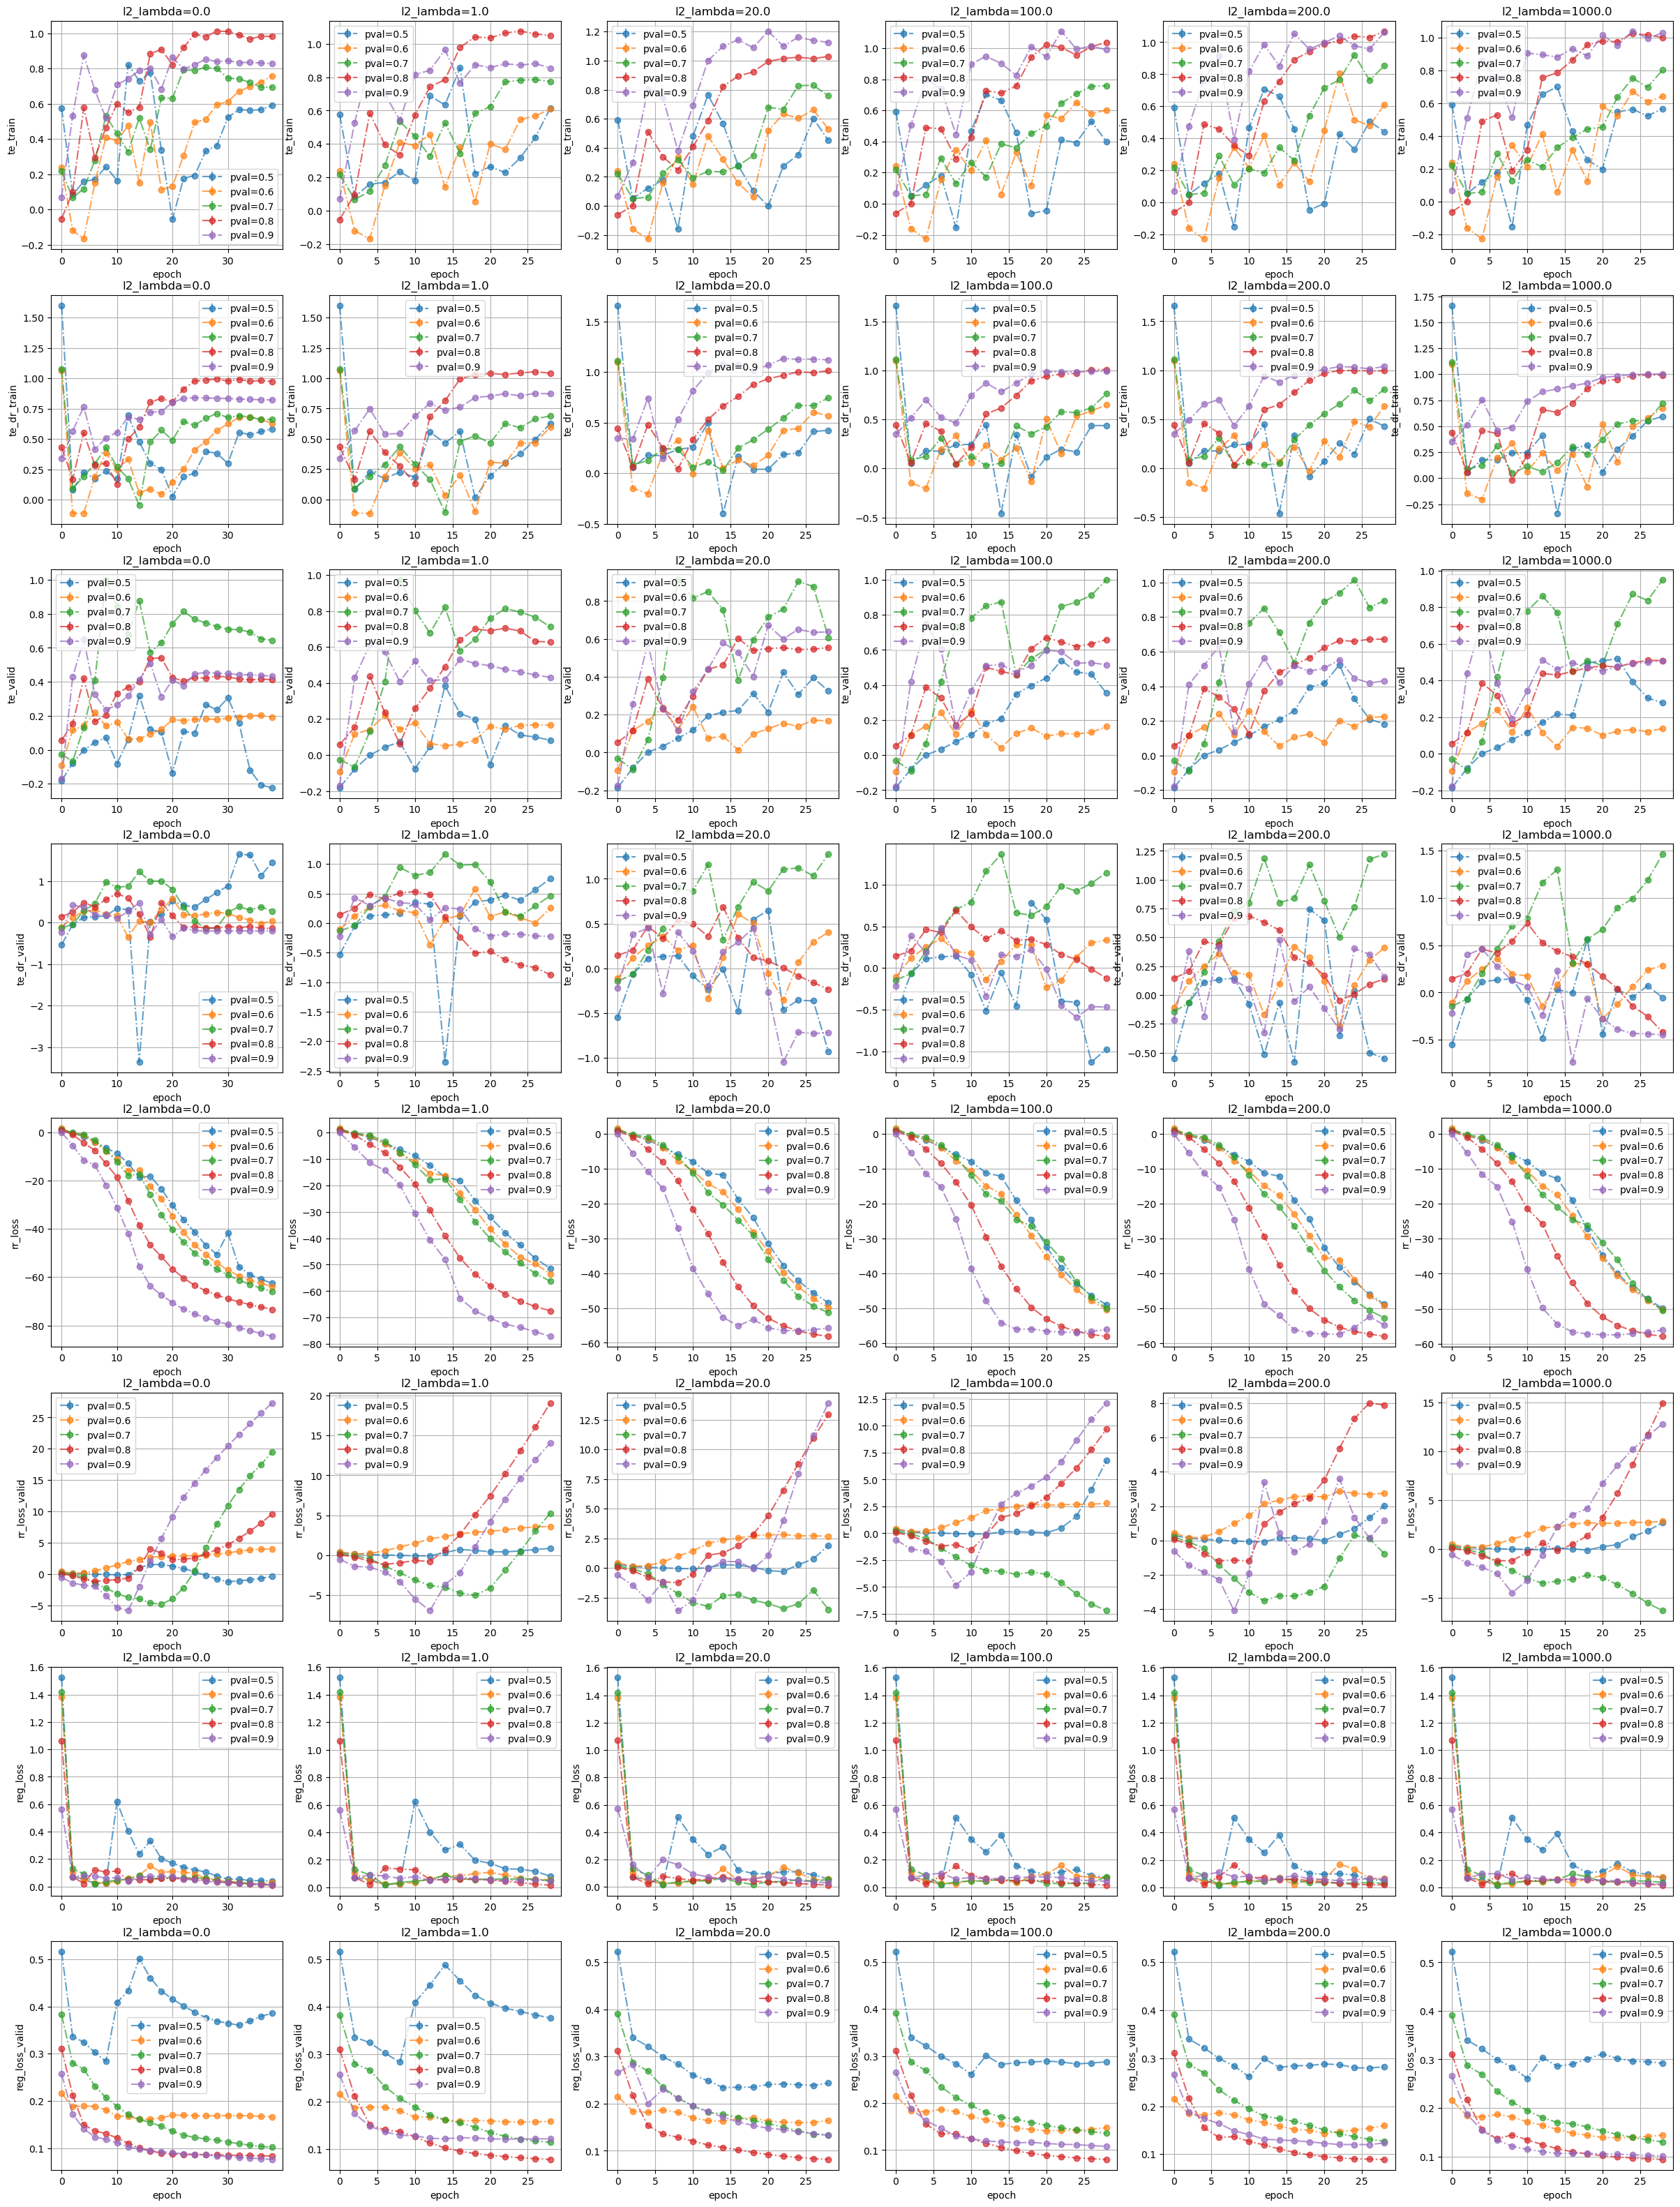

In [35]:
run_list=[3,]
main_enum=20
hlayer=0

rr_lambda=1
reg_lambda=1
tmle_lambda=0
l2_lambda_list=[0.0,1.0,20.0,100.0,200.0,1000.0]
topic_name="food"
num_sample=350
debug_tidx=0

pval_list=[0.5,0.6,0.7,0.8,0.9]
noise=0.0

plot_item_list=[
            "te_train",
#             "te_corr_train",
            "te_dr_train",
            "te_valid",
#             "te_corr_valid",
            "te_dr_valid",
            "rr_loss",
            "rr_loss_valid",
            "reg_loss",
            "reg_loss_valid",
#             "tmle_loss",
#             "l2_loss",
#             "alpha:tdtidx0-tcf0",
#             "alpha:tdtidx0-tcf1",
#             "alpha:tdtidx1-tcf0",
#             "alpha:tdtidx1-tcf1",
]


plt.rcParams['figure.figsize'] = [5*len(l2_lambda_list), 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),len(l2_lambda_list))


for lidx,l2_lambda in enumerate(l2_lambda_list):
    fname_pattern= "dataset/cebab/nlp_logs/cad.cebabs1riesz.rnum({}).sample({}).hlayer({}).pval({}).dtidx({}).rr_lmd({}).reg_lmd({}).tmle_lmd({}).l2_lmd({}).dcf().noise({}).topic({})/probe_metric_list.json"
    plot_one_pval_TE_timeline(ax=ax,
                           run_list=run_list,
                           num_sample=num_sample,
                           pval_list=pval_list,
                           hlayer=hlayer,
                           main_enum=main_enum,
                           fname_pattern=fname_pattern,
                           debug_tidx=debug_tidx,
                           rr_lambda=rr_lambda,
                           reg_lambda=reg_lambda,
                           tmle_lambda=tmle_lambda,
                           l2_lambda=l2_lambda,
                           noise=noise,
                           topic_name=topic_name,
                           tidx=lidx,
                           plot_upto=20,
                           plot_per_idx=1,
    )

In [16]:
run_list=[4,]
main_enum=1000
hlayer=0

rr_lambda=1
reg_lambda=1
tmle_lambda=0
l2_lambda=0.0
# debug_tidx_list=[0,1]
topic_list=["food",]
num_sample_list=[350,]
debug_tidx=0

pval_list=[0.5,0.6,0.7,0.8,0.9]
# degree_confoundedness=0.0

noise=0.0

plot_item_list=[
            "te_train",
#             "te_corr_train",
            "te_dr_train",
            "te_valid",
#             "te_corr_valid",
            "te_dr_valid",
            "rr_loss",
            "rr_loss_valid",
            "reg_loss",
            "reg_loss_valid",
#             "tmle_loss",
#             "l2_loss",
#             "alpha:tdtidx0-tcf0",
#             "alpha:tdtidx0-tcf1",
#             "alpha:tdtidx1-tcf0",
#             "alpha:tdtidx1-tcf1",
]


plt.rcParams['figure.figsize'] = [5, 5*len(plot_item_list)]
fig,ax = plt.subplots(len(plot_item_list),len(topic_list))

tidx=0
for topic_name,num_sample in zip(topic_list,num_sample_list):
    fname_pattern= "dataset/cebab/nlp_logs/cad.cebabs1riesz.rnum({}).sample({}).hlayer({}).pval({}).dtidx({}).rr_lmd({}).reg_lmd({}).tmle_lmd({}).l2_lmd({}).dcf().noise({}).topic({})/probe_metric_list.json"
    plot_one_pval_TE_timeline(ax=ax,
                           run_list=run_list,
                           num_sample=num_sample,
                           pval_list=pval_list,
                           hlayer=hlayer,
                           main_enum=main_enum,
                           fname_pattern=fname_pattern,
                           debug_tidx=debug_tidx,
                           rr_lambda=rr_lambda,
                           reg_lambda=reg_lambda,
                           tmle_lambda=tmle_lambda,
                           l2_lambda=l2_lambda,
                           noise=noise,
                           topic_name=topic_name,
                           tidx=tidx,
                           plot_upto=-1,
    )
    tidx+=1